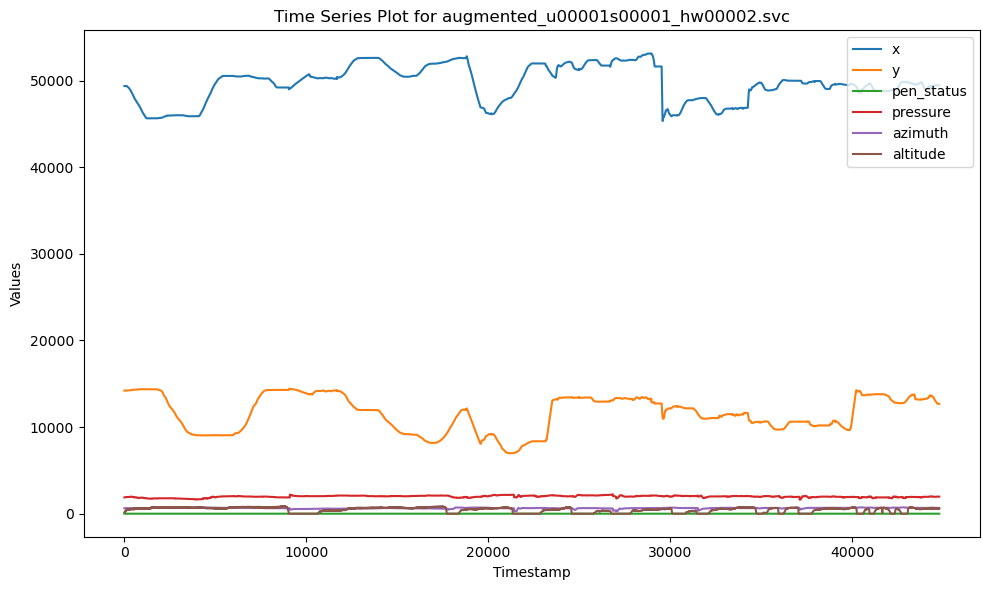

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define the correct path to your .svc file relative to your notebook
directory = 'augmented_data'
filename = 'augmented_u00001s00001_hw00002.svc'
file_path = f'{directory}/{filename}'

# Load the .svc file into a pandas DataFrame
# Assuming the file is space-separated
columns = ['x', 'y', 'timestamp', 'pen_status', 'pressure', 'azimuth', 'altitude']
data = pd.read_csv(file_path, sep=' ', names=columns, header=None)

# Create a mask for gaps in the timestamp greater than 8 units
gap_threshold = 8
timestamp_diff = data['timestamp'].diff()  # Get the differences between consecutive timestamps
gap_mask = timestamp_diff > gap_threshold  # Find where gaps are greater than 8 units

# Apply the mask by setting values to NaN where the gap occurs
for col in columns:
    if col != 'timestamp':
        data.loc[gap_mask, col] = np.nan  # Set the column values to NaN where there's a gap

# Plot each column against the timestamp
plt.figure(figsize=(10, 6))

# Plot each column with a different color, except the timestamp itself
for col in columns:
    if col != 'timestamp':
        plt.plot(data['timestamp'], data[col], label=col)

# Add titles and labels
plt.title(f'Time Series Plot for {filename}')
plt.xlabel('Timestamp')
plt.ylabel('Values')
plt.legend(loc='upper right')

# Display the plot
plt.tight_layout()
plt.show()
